In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Use the downloaded data

In [2]:
df =pd.read_csv("auto-mpg.data", delim_whitespace=True, names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car_name'])

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
df = df[df.horsepower != '?']

In [6]:
df.horsepower = df.horsepower.astype('float')
df.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car_name         object
dtype: object

### Ex 2. Convert this data to array

In [7]:
model = pd.DataFrame(df, columns = ['mpg', 'acceleration']) #predicting 'mpg' based on 'acceleration' / 'displacement' gave memory error so using 'acceleration'
points = model
points=points.reset_index().values

### Ex 3. Define the learning rate and no. of iterations as 0.0001 and 1000 respectively along with y-intercept and slope

In [8]:
learning_rate = 0.0001
num_iterations = 1000
y_initial = 0 
m_initial = 0 

### Ex 4. Create the functions to get the BEST FIT line
#### 1-Compute error for the line given the points
#### 2-Step gradient function
#### 3-Gradient descent

In [9]:
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 2]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [10]:
 def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 2]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [11]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, points, learning_rate)
    return [b, m]

print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(y_initial,m_initial,compute_error_for_line_given_points(y_initial, m_initial, points)))

Starting gradient descent at b = 0, m = 0, error = 610.4738265306123


In [12]:
[b, m] = gradient_descent_runner(points, y_initial, m_initial, learning_rate, num_iterations)
print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

After 1000 iterations b = 0.12186397820871156, m = 1.4915737460714782, error = 50.550071550466335


### Ex 5. Display using scatter plot the data points and the best fit line

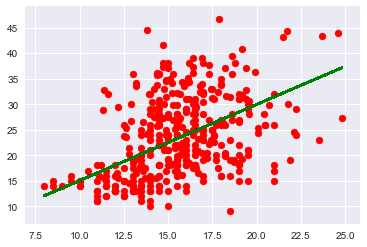

In [13]:
 for i in range(0, len(points)):
        x = points[i, 2]
        y = points[i, 1]
        plt.scatter(x,y,color='red')

        plt.plot(model.acceleration, (m * model.acceleration + b), color='green',linewidth=2)

### Ex 6. Display the Gradient and y-intercept value in the form y = mx+c

In [14]:
print('y = {0}x + {1}'.format(m,b))

y = 1.4915737460714782x + 0.12186397820871156


### Ex 7. Find the BEST FIT line i.e., m and c of y=mx+c with least error using trial and error method i.e., modify learning rate or iterations or both

y = 1.4832663608730705x + 0.09543107972686939       error =>50.58220098979198
at learning_rate =>1e-05 & iterations =>1000
y = 1.4929407096485403x + 0.09892106451207211       error =>50.55667559672851
at learning_rate =>2e-05 & iterations =>1000
y = 1.4928252506430004x + 0.10179850019876834       error =>50.55584567457327
at learning_rate =>3e-05 & iterations =>1000
y = 1.492646483697924x + 0.10467023696486742       error =>50.55501779331457
at learning_rate =>4e-05 & iterations =>1000
y = 1.492467424948391x + 0.1075402075293702       error =>50.55419091624064
at learning_rate =>5e-05 & iterations =>1000
y = 1.492288472305722x + 0.11040843777729603       error =>50.553365042092636
at learning_rate =>6e-05 & iterations =>1000
y = 1.492109628153563x + 0.11327492891553205       error =>50.55254016965489
at learning_rate =>7e-05 & iterations =>1000
y = 1.4919308924408765x + 0.11613968199842313       error =>50.55171629771294
at learning_rate =>8e-05 & iterations =>1000
y = 1.49175226510206

y = 1.4815750800089993x + 0.28212131568572896       error =>50.504835834784544
at learning_rate =>0.00067 & iterations =>1000
y = 1.4814027318843774x + 0.2848836893262185       error =>50.50406982495351
at learning_rate =>0.00068 & iterations =>1000
y = 1.4812304882644112x + 0.28764438797949016       error =>50.5033047442576
at learning_rate =>0.00069 & iterations =>1000
y = 1.4810583490857965x + 0.29040341266016917       error =>50.502540591570494
at learning_rate =>0.0007 & iterations =>1000
y = 1.4808863142852682x + 0.29316076438226707       error =>50.50177736576703
at learning_rate =>0.00071 & iterations =>1000
y = 1.4807143837995989x + 0.2959164441591825       error =>50.501015065723486
at learning_rate =>0.00072 & iterations =>1000
y = 1.4805425575655995x + 0.2986704530036999       error =>50.50025369031768
at learning_rate =>0.00073 & iterations =>1000
y = 1.4803708355201193x + 0.3014227919279918       error =>50.499493238428414
at learning_rate =>0.00074 & iterations =>1000
y 

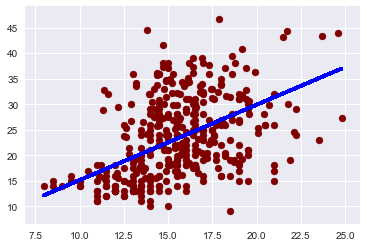

In [20]:
# Combinations of learning rates to get least error
x_error = 60  
b_final = 0   
m_final = 0  
l_final = 0   
iter_final = 0 

# Looping the entire process to find least error value
for i in range(1,100,1):
    learning_rate = i/100000
    num_iterations = 1000
    y_initial = 0 
    m_initial = 0 
    [b, m] = gradient_descent_runner(points, y_initial, m_initial, learning_rate, num_iterations)
    x_err = compute_error_for_line_given_points(b, m, points)

    # Exchanging final values upon encounter of relative least error
    if x_err<=x_error:
        x_error=x_err
        b_final=b
        m_final=m
        l_final=learning_rate
        iter_final=num_iterations
        
# Printing the final values
        print('y = {0}x + {1}       error =>{2}'.format(m_final,b_final,x_error,))
        print('at learning_rate =>{0} & iterations =>{1}'.format(l_final, iter_final))

# Plotting
for i in range(0, len(points)):
        x = points[i, 2]
        y = points[i, 1]
        plt.scatter(x,y,color='maroon')
       
        plt.plot(model.acceleration, (m_final * model.acceleration + b_final), color='blue',linewidth=3)
        